## Name: Shwetabahen Rangani


Date : Feb 24/2023






In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('olympic_athletes.csv')


# Quesion 1

#### The following violin plot shows the height distributions of athletes in the Gymnastics, Cycling and Basketball sports at the Olympic games between 2000 to 2016 (inclusive). The line inside each violin shows the location of the median value.

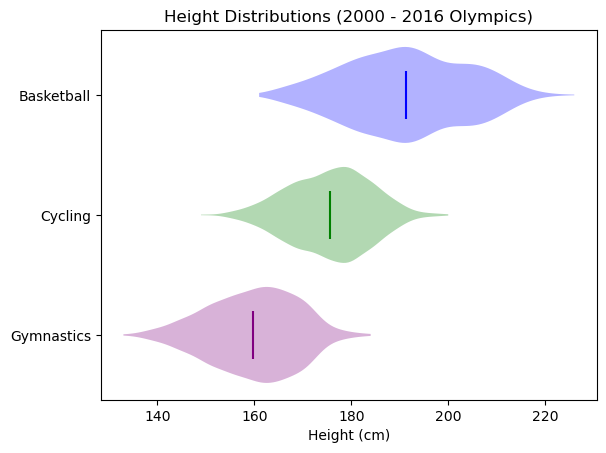

In [2]:
#idea from https://stackoverflow.com/questions/43345599/process-pandas-dataframe-into-violinplot
# set mean color https://stackoverflow.com/questions/69038625/change-the-color-of-the-individual-max-and-mean-line-in-a-violin-plot-using-matp
# set bodis color(facecolor) idea from https://stackoverflow.com/questions/71943254/change-color-of-violin-plot-in-matplotlib-according-to-how-broad-the-distributio


df1=df.drop_duplicates(['ID']).dropna(subset=['Height'])

Cycling =  df1[(df1['Sport'] == 'Cycling') & ((df1['Year'] <= 2016) & (df1['Year'] >= 2000)) ].reset_index()
Basketball = df1.loc[(df1['Sport'] == 'Basketball') & ((df1['Year'] <= 2016) & (df1['Year'] >= 2000))].reset_index()
Gymnastics = df1[(df1['Sport'] == 'Gymnastics') & ((df1['Year'] <= 2016) & (df1['Year'] >= 2000))].reset_index()
fig, ax = plt.subplots()
data_to_plot = [Gymnastics['Height'], Cycling['Height'], Basketball['Height']]

ax.set_title('Height Distributions (2000 - 2016 Olympics)')
ax.set_xlabel('Height (cm)')

plots=ax.violinplot(data_to_plot, vert=False,showmeans=True,showextrema=False,widths=0.8)

colors = [ 'Purple', 'Green','Blue']
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)

cmean_colors = plots['cmeans'].get_color()
plots['cmeans'].set_color(colors)


ax.set_yticks([1, 2, 3], labels=['Gymnastics','Cycling','Basketball'])
ax.set_xticks([140,160,180,200,220])
plt.show()


### Question-2

#### This line plot shows the average height of male (blue) and female (red) Olympians over the history of the Summer Olympics. The shaded region represents the standard deviation about the average.


/var/folders/15/r60z_2ns0ll4xmbm4715mq480000gn/T/ipykernel_1361/3285798987.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MRec = MaleRec.groupby(['Year'])['ID', 'Sex','Height','Year','Season','Sport'].mean()
/var/folders/15/r60z_2ns0ll4xmbm4715mq480000gn/T/ipykernel_1361/3285798987.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MRec = MaleRec.groupby(['Year'])['ID', 'Sex','Height','Year','Season','Sport'].mean()
/var/folders/15/r60z_2ns0ll4xmbm4715mq480000gn/T/ipykernel_1361/3285798987.py:14: FutureWarning: ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these col

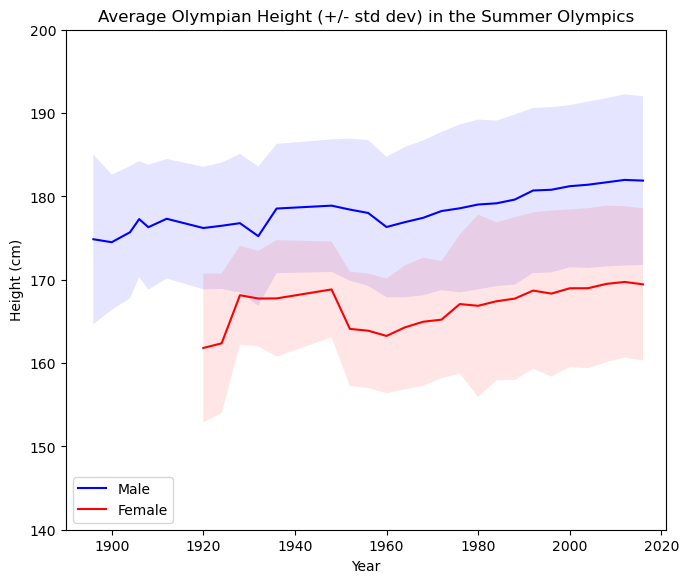

In [3]:
#for fill between https://stackoverflow.com/questions/29321835/is-it-possible-to-get-color-gradients-under-curve-in-matplotlib


df2=df.drop_duplicates(['ID']).dropna(subset=['Height'])

fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])

FemaleRec = df[(df['Season'] == 'Summer') & (df['Sex'] == 'F') ]
MaleRec = df2[(df2['Season'] == 'Summer') & (df2['Sex'] == 'M') ]


MRec = MaleRec.groupby(['Year'])['ID', 'Sex','Height','Year','Season','Sport'].mean()
qual1 = MaleRec.groupby("Year").agg([np.mean, np.std]).reset_index()
male1 = qual1.Height["mean"] +  qual1.Height["std"]
male2 = qual1.Height["mean"] -  qual1.Height["std"]
ax.plot(MRec['Year'], MRec['Height'],color="blue",label="Male")
ax.fill_between(MRec['Year'],male1,male2,color="blue",alpha=0.1,edgecolor="none")

FRec = FemaleRec.groupby(['Year'])['ID', 'Sex','Height','Year','Season','Sport'].mean()
qual = FemaleRec.groupby("Year").agg([np.mean, np.std]).reset_index()
female1 = qual.Height["mean"] +  qual.Height["std"]
female2 = qual.Height["mean"] -  qual.Height["std"]
ax.plot(FRec['Year'], FRec['Height'],color="red",label="Female")
ax.fill_between(FRec['Year'],female1,female2,color="red",alpha=0.1,edgecolor="none")


ax.set_ylim((140, 200))

ax.set_xlim((1890,2021))

ax.set_xlabel('Year')
ax.set_ylabel('Height (cm)')
ax.set_title("Average Olympian Height (+/- std dev) in the Summer Olympics")
ax.legend(loc='lower left')




## Question-3

#### The bar plot below shows the top 10 most decorated Olympians. That is, the Olympic athletes that have won the highest total number of medals. Each bar is colour coded according to the number of gold, silver and bronze medals won by that athlete. In this way, the total number of medals won is represented, along with the breakdown per medal type.

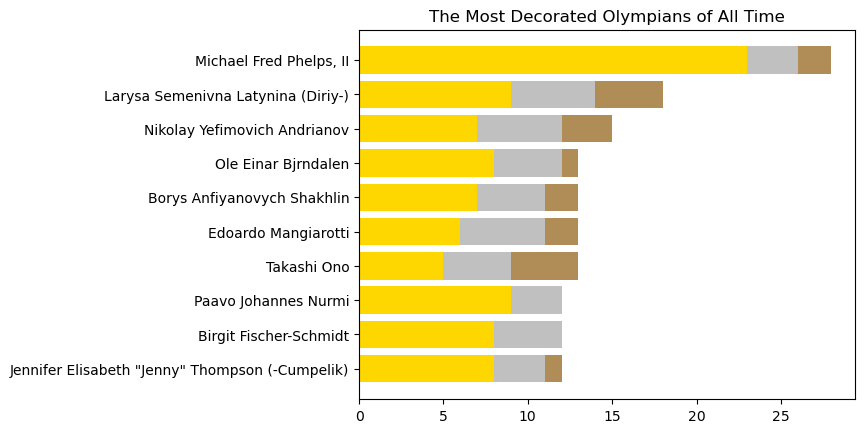

In [4]:
# for loop https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7
# logic idea from https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
# get idea to set colors from here :https://stackoverflow.com/questions/11273196/stacked-bar-chart-with-differently-ordered-colors-using-matplotlib
# for reverse order https://www.askpython.com/python/array/reverse-an-array-in-python


df3=df
df4=df3.groupby(['Name']).count().reset_index().nlargest(15,'Medal')


goldData = df.groupby(['Name', 'Medal'])["Medal"].count().reset_index(name="GoldMedalCount")
goldData= goldData[(goldData['Medal'] == 'Gold')]
goldData= goldData.rename(columns={'Medal': 'GoldMedal'})

silverData = df.groupby(['Name', 'Medal'])["Medal"].count().reset_index(name="SilverMedalCount")
silverData= silverData[(silverData['Medal'] == 'Silver')]
silverData= silverData.rename(columns={'Medal': 'SilverMedal'})

bronzeData = df.groupby(['Name', 'Medal'])["Medal"].count().reset_index(name="BronzeMedalCount")
bronzeData= bronzeData[(bronzeData['Medal'] == 'Bronze')]
bronzeData= bronzeData.rename(columns={'Medal': 'BronzeMedal'})


merged = pd.merge(df4, goldData, how="inner", on=["Name"])
merged = pd.merge(merged, silverData, how="inner", on=["Name"])
merged = pd.merge(merged, bronzeData, how="left", on=["Name"])


merged=merged.nlargest(15,'Medal').sort_values(by=['Medal','GoldMedalCount'], ascending=False)                               

FinalData= merged.head(10)  
name= FinalData['Name'][::-1]

vals = {
        
    'Gold': (FinalData['GoldMedalCount'].to_numpy()[::-1]),
    'Silver': (FinalData['SilverMedalCount'].to_numpy()[::-1]),
    'Bronze':(FinalData['BronzeMedalCount'].to_numpy()[::-1]),
}
colors = {'Gold':"#FFD700",'Silver':"#C0C0C0",'Bronze':"#B08D57"}
fig, ax = plt.subplots()
bottom = np.zeros(10)

for i,val in vals.items():
    ax.barh(name, val,color=colors[i], left=bottom)
    bottom += val
ax.set_title("The Most Decorated Olympians of All Time")
plt.show()
